Found 9543 files belonging to 17 classes.
Using 7635 files for training.
Found 9543 files belonging to 17 classes.
Using 1908 files for validation.
Found 3201 files belonging to 17 classes.
Using 2561 files for training.
['Apricot', 'Blueberry', 'Cherry 2', 'Cocos', 'Fig', 'Grape White', 'Kaki', 'Lychee', 'Mulberry', 'Onion White', 'Pear', 'Pear Stone', 'Physalis', 'Plum 3', 'Quince', 'Tamarillo', 'Tomato Heart']


2024-03-20 19:38:55.445637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


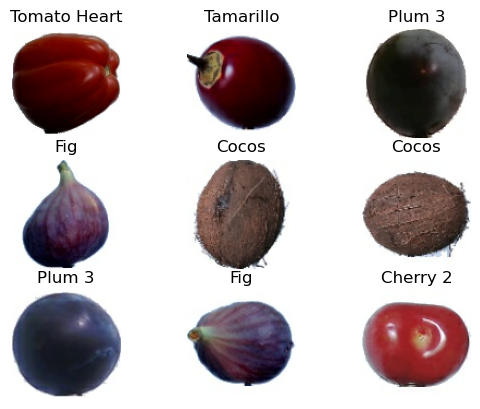

In [28]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import random

#tf.data.Dataset
path = "/home/c100rczyk/VSCode/DataSets/Fruits_mini/Training"
path_test = "/home/c100rczyk/VSCode/DataSets/Fruits_mini/Test"
width_img = 100
height_img = 100

# generating dataset tf.data.Dataset from file in directory
# for training and validation data
# processing data on an ongoing basis during training network. Data are loading from memory RAM in batches
products_train = keras.utils.image_dataset_from_directory(path, 
                                                          batch_size=128, labels='inferred',
                                                          color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
                                                          validation_split = 0.2, subset="training", seed=187
                                                          )
products_val = keras.utils.image_dataset_from_directory(path,
                                                        batch_size=128, labels='inferred',
                                                        color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
                                                        validation_split=0.2, subset="validation", seed=187
                                                        )

# Here we get 80% of data test. Check how to get whole data 
products_test = keras.utils.image_dataset_from_directory(path_test,
                                                         batch_size=64, labels='inferred',
                                                         color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
                                                         validation_split = 0.2, subset="training", seed=187
                                                        )


class_names = products_train.class_names
print(class_names)


# get one batch
for image, labels in products_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')






In [29]:
# how many classes 
print(np.shape(products_train.class_names))

(17,)


In [25]:
# Create pairs of images. Matching pairs with label 0  and  mismatched pairs as labels 1


def make_pairs(x,y):
    """
    Creating pairs. label 0 - matching pairs  , label 1 - mismatched pairs

    Arguments: 
        x - images
        y - labels 

    Returns:
        list of pairs
    """
    num_classes = np.shape(products_train.class_names)[0] 
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]
    #print(digit_indices)
    pairs = []
    labels = []

    #work on 128 data batch only every time
    for i in range(len(x)):
        # add matching example
        x1 = x[i]
        label1 = y[i]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1,x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0 , num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1) 
        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1,x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")

    
# get images and his labels apart
(train_images, train_labels) = next(iter(products_train.take(1)))
(val_images, val_labels) = next(iter(products_val.take(1)))
(test_images, test_labels) = next(iter(products_test.take(1)))

print(train_images.shape)
#print(train_labels.shape)
#print(len(train_images))

#train_images = train_images.numpy()   # it's not necesary   tensor format is ok
#train_labels = train_labels.numpy()

pairs_train, labels_train = make_pairs(train_images, train_labels)
pairs_val, labels_val = make_pairs(val_images, val_labels)
pairs_test, labels_test = make_pairs(test_images, test_labels)              

print(pairs_train.shape)



(128, 100, 100, 3)
(256, 2, 100, 100, 3)


In [26]:
# how many data has each batch:   (są to tensory)
for img_batch, label_batch in products_train:
    print(img_batch.shape)
    print(label_batch.shape)
    break

(128, 100, 100, 3)
(128,)


### What we have:
Now we have first batch 128 images. And produced 256 pairs of images : 128 matched and 128 non-matched

In [27]:
x_train_1 = pairs_train[:,0]
x_train_2 = pairs_train[:,1]

x_val_1 = pairs_val[:,0]
x_val_2 = pairs_val[:,1]

x_test_1 = pairs_test[:,0]
x_test_2 = pairs_test[:,1]
